In [19]:
import pandas as pd
test = pd.read_csv('./test.csv',encoding='ISO-8859-1')
train = pd.read_csv('./train.csv',encoding='ISO-8859-1')

In [20]:
test.drop(['textID','Age of User','Time of Tweet','Population -2020','Country','Density (P/Km²)','Land Area (Km²)'],axis=1,inplace=True)
test.dropna(inplace=True)
test['sentiment'].replace({'neutral':0,'positive':1,'negative':-1},inplace=True)
# test

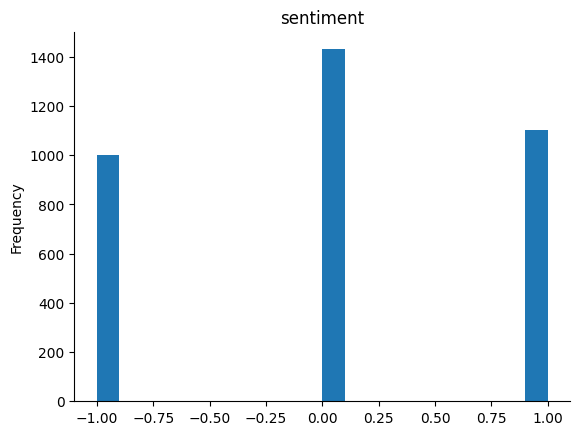

In [21]:
from matplotlib import pyplot as plt
test['sentiment'].plot(kind='hist', bins=20, title='sentiment')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [22]:
train.drop(['Unnamed: 0','Age of User','Time of Tweet','Population -2020','Country','Density (P/Km²)','Land Area (Km²)','selected_text'],axis=1,inplace=True)
train.dropna(inplace=True)
train['sentiment'].replace({'neutral':0,'positive':1,'negative':-1},inplace=True)
# train


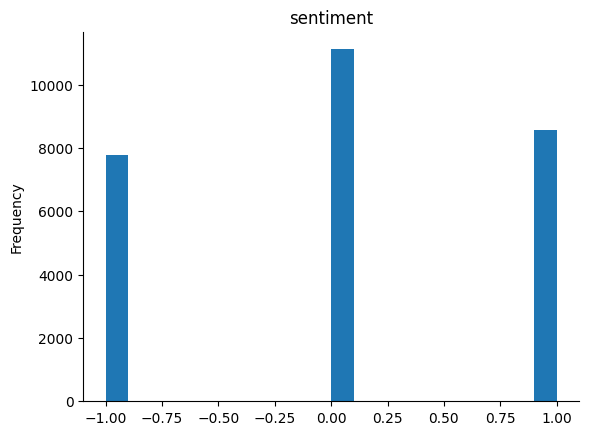

In [23]:
from matplotlib import pyplot as plt
train['sentiment'].plot(kind='hist', bins=20, title='sentiment')
plt.gca().spines[['top', 'right',]].set_visible(False)

# **Cleaning the text data**

In [24]:
# Converting every sentence to lowercase
train['text'] = train['text'].apply(lambda x: x.lower())
test['text'] = test['text'].apply(lambda x: x.lower())

# removing urls
import re
def remove_urls(text):
 text = re.sub('http[s]?://(?:[a-zA-Z]|[0–9]|[$-_@.&+#]|[!*\(\),]|’\‘(?:%[0–9a-fA-F][0–9a-fA-F]))+','', text)
 return text

train['text'] = train['text'].apply(lambda x: remove_urls(x))
test['text'] = test['text'].apply(lambda x: remove_urls(x))


# Removing twitter handles, punctuation, extra spaces, numbers and special characters
import string
import re

def remove_noise(tweet):
    tweet = re.sub(r"(@[A-Za-z0–9_]+)", "", tweet)
    tweet = "".join([char if char not in string.punctuation else " " for char in tweet])
    tweet = re.sub(r' +', ' ', tweet)
    tweet = re.sub(r"[0–9]+", "", tweet)
    tweet = re.sub(r"[^A-Za-z0–9_. ]+", "", tweet)
    return tweet

train['text'] = train['text'].apply(lambda x: remove_noise(x))
test['text'] = test['text'].apply(lambda x: remove_noise(x))


# removing stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

  # Loading stop words and removing negative stop words from the list
stop_words = stopwords.words('english')
words_to_keep = ['don', "don't", 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'no', 'nor', 'not', 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
my_stop_words = stop_words
for word in words_to_keep:
  my_stop_words.remove(word)

  # Removing stop words from the text
def remove_stop_words(text):
 tokens = word_tokenize(text)
 text_with_no_stop_words = [token for token in tokens if not token in my_stop_words]
 reformed_text =' '.join(text_with_no_stop_words)
 return reformed_text

train['text'] = train['text'].apply(lambda x: remove_stop_words(x))
test['text'] = test['text'].apply(lambda x: remove_stop_words(x))


# stemming
from nltk.stem.lancaster import LancasterStemmer
stemmer = LancasterStemmer()

def lemmatise_sentence(text):
 token_words = word_tokenize(text)
 lemmatized_text = []
 for word in token_words:
  lemmatized_text.append(stemmer.stem(word))
  lemmatized_text.append(" ")
 return "".join(lemmatized_text)
train['text'] = train['text'].apply(lambda x: lemmatise_sentence(x))
test['text'] = test['text'].apply(lambda x: lemmatise_sentence(x))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# **Training and Testing**

In [25]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(train['text'])
y_train = train['sentiment']
X_test = vectorizer.transform(test['text'])
y_test = test['sentiment']

lr = LogisticRegression(max_iter=1731)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
logistic_accuracy = lr.score(X_test, y_test)
print(logistic_accuracy)

0.7014714204867006


Accuracy: 0.701
Precision: [0.69297297 0.64805521 0.79310345]
Recall: [0.64035964 0.72237762 0.72982774]
F1 Score: [0.66562825 0.68320106 0.76015109]


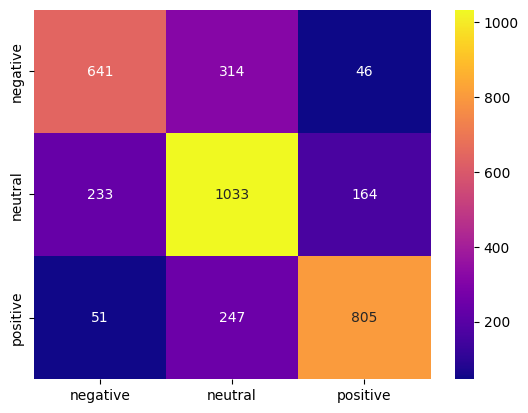

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

cm = confusion_matrix(y_test,y_pred)

accuracy = np.trace(cm) / np.sum(cm)
precision = np.diag(cm) / np.sum(cm, axis=0)
recall = np.diag(cm) / np.sum(cm, axis=1)
f1 = 2 * (precision * recall) / (precision + recall)

sns.heatmap(cm, xticklabels=['negative','neutral','positive'], yticklabels=['negative','neutral','positive'], annot=True, fmt='d', annot_kws={'fontsize': 10}, cmap="plasma")

print('Accuracy: {:.3f}'.format(accuracy))
print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall))
print('F1 Score: {}'.format(f1))


In [27]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
nb_accuracy = nb.score(X_test,y_test)
print(nb_accuracy)

0.6615732880588568


Accuracy: 0.662
Precision: [0.68638393 0.6025958  0.73333333]
Recall: [0.61438561 0.68181818 0.6781505 ]
F1 Score: [0.6483922  0.63976378 0.70466321]


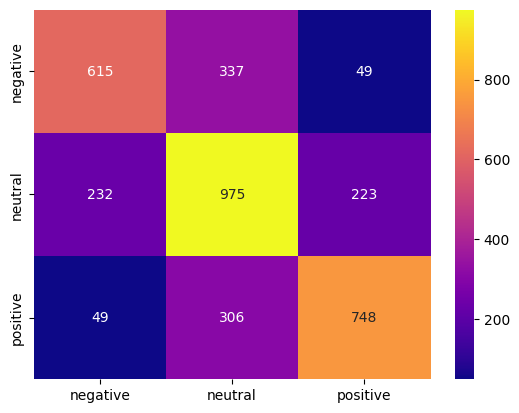

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

cm = confusion_matrix(y_test,y_pred)

accuracy = np.trace(cm) / np.sum(cm)
precision = np.diag(cm) / np.sum(cm, axis=0)
recall = np.diag(cm) / np.sum(cm, axis=1)
f1 = 2 * (precision * recall) / (precision + recall)

sns.heatmap(cm, xticklabels=['negative','neutral','positive'], yticklabels=['negative','neutral','positive'], annot=True, fmt='d', annot_kws={'fontsize': 10}, cmap="plasma")

print('Accuracy: {:.3f}'.format(accuracy))
print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall))
print('F1 Score: {}'.format(f1))